In [1]:
import sys
print(sys.version)

3.9.12 (main, Jun  1 2022, 11:38:51) 
[GCC 7.5.0]


In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models

print("TensorFlow version:", tf.__version__)
tf.keras.backend.set_floatx('float64')

TensorFlow version: 2.8.2


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image
import os
import csv
import random

import cv2
import imutils
import glob
# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [38]:
#Określenie ścieżek do plików
folder = '../../Dane/Baza_zdjec_zlaczone_1/'
nazwa_CSV = 'nowe.csv'
zlaczone = 'Zlaczone/'
folder_2 = '../../Dane/Baza_zdjec_moje/'
folder_aktorzy = '../../Dane/Baza_aktorzy_zlaczone/'
nazwa_aktorzy_CSV = 'aktorzy.csv'
slesh = '/'
png = '.png'

In [5]:
def release_list(a):
    
    del a[:]
    del a

In [6]:
#Wczytanie pliku CSV do tablicy images

with open(folder+nazwa_CSV,"r") as csvfile:
    lines = csvfile.readlines()
csvfile.close()

new = []

for i in lines:
    new.append(i.split(" "))

    
value = []
for i in new[0]:
    value.append(int(i))    
    
print(len(value))

3600


In [7]:
#Wczytanie zdjęć do tablicy images
images = []
size = len(value)

for i in range(size):
    im = Image.open(folder+str(i)+png)
    arr_im = np.array(im) 
    arr_im = arr_im / 255.0
    images.append(arr_im) 
print(len(images))

3600


In [8]:
#Inicjalizacja tablic
rand_list = []
rand_list = np.zeros((len(images)), dtype=np.uint8)

x_test = []
y_test = []

x_train = []
y_train = []


#Okreslanie wielkosci zbiorów
eighty = int(len(images)*20/100)
twenty = len(images) - eighty

#Losowanie zbioru testowego
for i in range(eighty):
    
    #Pierwsze losowanie wartości
    rand = random.randint(0,len(images)-1)
    
    #Sprawdzenie czy wylosowana wartość się powtarza
    while (rand_list[rand] == 1) :
        #Jeżeli tak to ponownie losuje
        rand = random.randint(0,len(images)-1)
    
    #Zapisanie zdjecia i wartości do nowej tablicy
    x_test.append(images[rand])
    y_test.append(value[rand])
    rand_list[rand] = 1

#Losowanie zbioru uczącego
for j in range(twenty):
    
    #Pierwsze losowanie wartości
    rand = random.randint(0,len(images)-1)
    
    #Sprawdzenie czy wylosowana wartość się powtarza
    while (rand_list[rand] == 1) :
        #Jeżeli tak to ponownie losuje
        rand = random.randint(0,len(images)-1)
        
    #Zapisanie zdjecia i wartości do nowej tablicy
    x_train.append(images[rand])
    y_train.append(value[rand])
    rand_list[rand] = 1
    
    
release_list(images)
release_list(value)

In [9]:
#Sprawdzenie poprawności losowania
val_1 = 2 * sum(y_test) / len(rand_list)
print("%.2f" % val_1 + '%') 


val_2 = 2 * sum(y_train) / len(rand_list)
print("%.2f" % val_2 + '%') 

0.20%
0.80%


In [10]:
x_train = np.array(x_train)
x_test = np.array(x_test)

y_train = np.array(y_train)
y_test = np.array(y_test)

In [11]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 128, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='relu'))

2022-12-09 20:11:21.726269: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-09 20:11:21.730741: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 126, 32)       320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 28, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 21504)             0

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(np.array(x_train), 
                    y_train, 
                    epochs=5, 
                    validation_data=(np.array(x_test), y_test))

Epoch 1/5
90/90 [==============================] - 35s 386ms/step - loss: 1.2565 - accuracy: 0.6451 - val_loss: 0.2444 - val_accuracy: 0.8889
Epoch 2/5
90/90 [==============================] - 38s 421ms/step - loss: 0.1006 - accuracy: 0.9646 - val_loss: 0.0831 - val_accuracy: 0.9722
Epoch 3/5
90/90 [==============================] - 34s 375ms/step - loss: 0.0403 - accuracy: 0.9885 - val_loss: 0.0434 - val_accuracy: 0.9931
Epoch 4/5
90/90 [==============================] - 33s 368ms/step - loss: 0.0247 - accuracy: 0.9931 - val_loss: 0.0721 - val_accuracy: 0.9833
Epoch 5/5
90/90 [==============================] - 33s 363ms/step - loss: 0.0303 - accuracy: 0.9920 - val_loss: 0.0462 - val_accuracy: 0.9931


23/23 - 2s - loss: 0.0462 - accuracy: 0.9931 - 2s/epoch - 107ms/step


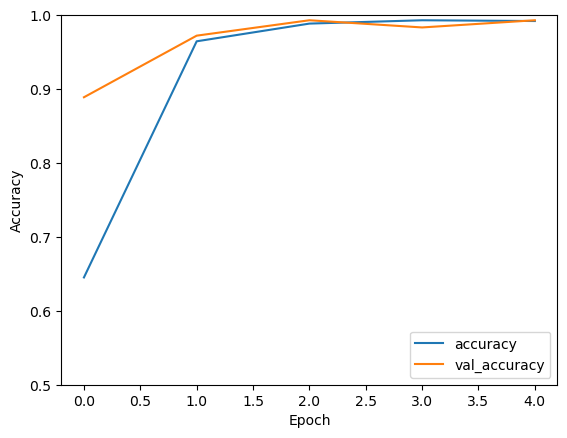

In [14]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

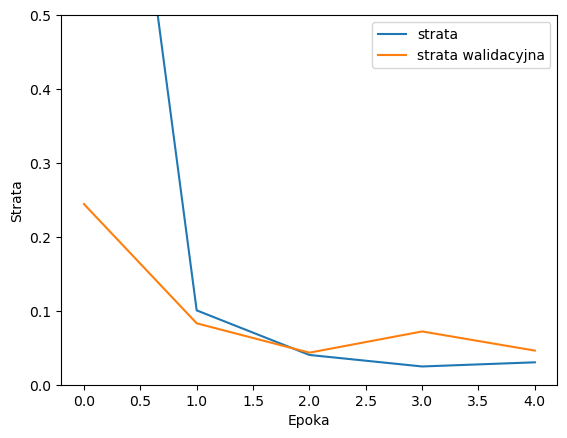

In [15]:
plt.plot(history.history['loss'], label='strata')
plt.plot(history.history['val_loss'], label = 'strata walidacyjna')
plt.xlabel('Epoka')
plt.ylabel('Strata')
plt.ylim([0.0, 0.5])
plt.legend(loc='upper right')

In [16]:
model.evaluate(x_test,  y_test, verbose=2)

23/23 - 2s - loss: 0.0462 - accuracy: 0.9931 - 2s/epoch - 96ms/step


[0.04617118542600009, 0.9930555555555556]

In [18]:
arr_2 = model.predict(x_test)

In [19]:
ok = 0
wrong = 0
err = 0

arr_prob = []

for x in range(len(arr_2)):
    
    maks = 0
    for i in range(10): 
        
        if arr_2[x][i] > arr_2[x][maks]:
              maks = i
    
    if maks == 0 :
        arr_prob.append(0)
        if maks == y_test[x] :
            ok = ok + 1          
        else:
            wrong = wrong + 1
            
            
    if maks == 1 :
        arr_prob.append(1)
        if maks == y_test[x] :
            ok = ok + 1        
        else:
            wrong = wrong + 1       
    
    
    if maks > 2 :
        err = err + 1
        print(x)
        
       
    
print(ok) 
print(wrong) 
print(err) 
     

715
5
0


In [20]:
names = [['Tn','Nn'],['Np', 'Tp']]
names = np.reshape(names,(2,2))
print(names)

tf.math.confusion_matrix(y_test,arr_prob)

[['Tn' 'Nn']
 ['Np' 'Tp']]


<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[349,   5],
       [  0, 366]], dtype=int32)>

In [30]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [31]:
#Wczytanie moich zdjęć


In [32]:
moje = []
for i in range(6):
    im = Image.open(folder_2+zlaczone+str(i)+png)
    arr_moje = np.array(im)
    arr_moje = arr_moje / 255.0
    moje.append(arr_moje) 
print(len(moje))

moje = np.array(moje)

6


In [33]:
arr_4 = probability_model(moje)

In [34]:
print(arr_4)

tf.Tensor(
[[0.001 0.999 0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.039 0.961 0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.002 0.998 0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.004 0.996 0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    1.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.001 0.999 0.    0.    0.    0.    0.    0.    0.    0.   ]], shape=(6, 10), dtype=float64)


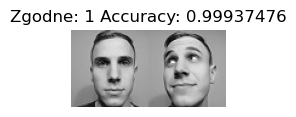

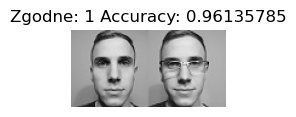

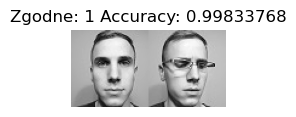

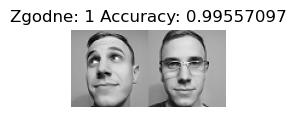

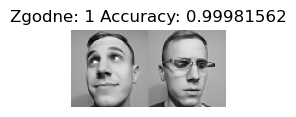

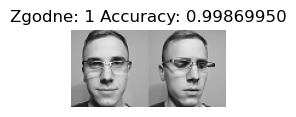

In [35]:
class_names = ["Rożne", "Zgodne"]

for x in range(len(arr_4)):
    
    if arr_4[x][0] > arr_4[x][1] :
        similar = 0
    else :
        similar = 1
     
    sample_image = np.array(moje[x])
    plt.figure(figsize=(2,4))
    plt.axis('off')
    plt.title(class_names[similar]+': {} Accuracy: {:.8f}'.format(similar,arr_4[x][similar]))
    plt.imshow(sample_image, cmap = 'gray')

In [ ]:




#Wczytanie zdjęć aktorów






In [39]:
with open(folder_aktorzy+nazwa_aktorzy_CSV,"r") as csvfile:
    lines = csvfile.readlines()
csvfile.close()


tmp = []
act_label = []

for i in lines:
    tmp.append(i.split(" "))

    
act_label = []
for i in tmp[0]:
    act_label.append(int(i))    
    
act_label = np.array(act_label)
print(len(act_label))

2052


In [40]:
#Wczytanie zdjęć aktorów do tablicy

act = []
size = len(act_label)

for i in range(size):
    im = Image.open(folder_aktorzy+str(i)+png)
    arr_im = np.array(im) 
    arr_im = arr_im / 255.0
    act.append(arr_im) 
    
act = np.array(act)
print(len(act))

2052


[[0.984 0.984 0.984 ... 0.192 0.196 0.196]
 [0.984 0.984 0.98  ... 0.2   0.192 0.192]
 [0.984 0.98  0.976 ... 0.204 0.196 0.192]
 ...
 [0.98  0.98  0.98  ... 0.298 0.294 0.29 ]
 [0.98  0.98  0.98  ... 0.294 0.298 0.302]
 [0.98  0.98  0.98  ... 0.298 0.31  0.302]]


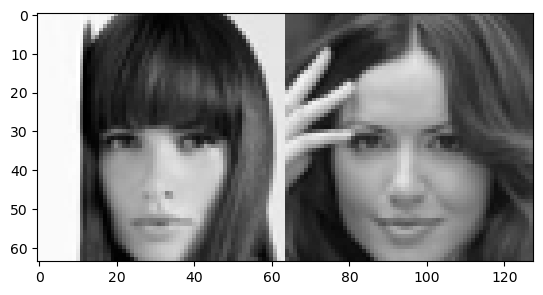

In [41]:
plt.imshow(act[0],cmap = 'gray')
print(act[0])

In [46]:
arr_5 = probability_model(act[:100])

In [50]:
print(act_label[2])

1


In [47]:
print(arr_5)

tf.Tensor(
[[0.997 0.003 0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.425 0.575 0.    0.    0.    0.    0.    0.    0.    0.   ]
 [1.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.976 0.024 0.    0.    0.    0.    0.    0.    0.    0.   ]
 [1.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [1.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [1.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [1.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.681 0.318 0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.999 0.001 0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.287 0.713 0.    0.    0.    0.    0.    0.    0.    0.   ]
 [1.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.302 0.697 0.    0.    0.    0.    0.    0.    0.    0.   ]
 [1.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.887 0.112 0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.061 0.938 0.    0.    0.    0.    0.    

In [48]:
ok = 0
wrong = 0
err = 0

arr_prob = []

for x in range(len(arr_5)):
    
    maks = 0
    for i in range(10): 
        
        if arr_5[x][i] > arr_2[x][maks]:
              maks = i
    
    if maks == 0 :
        arr_prob.append(0)
        if maks == act_label[x] :
            ok = ok + 1          
        else:
            wrong = wrong + 1
            
            
    if maks == 1 :
        arr_prob.append(1)
        if maks == act_label[x] :
            ok = ok + 1        
        else:
            wrong = wrong + 1       
    
    
    if maks > 2 :
        err = err + 1
        print(x)
        
       
    
print(ok) 
print(wrong) 
print(err) 

0
100
0


In [12]:
                                            #Rozmiar 128x64x1 ?
model = tf.keras.models.Sequential([         
    tf.keras.layers.Conv2D(8,3, input_shape= [64,64,1], activation='relu', padding='same'),
    tf.keras.layers.Conv2D(16,3, activation='relu', padding='same'),
    tf.keras.layers.Conv2D(32,3, activation='relu', padding='same'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [14]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 64, 64, 8)         80        
                                                                 
 conv2d_7 (Conv2D)           (None, 64, 64, 16)        1168      
                                                                 
 conv2d_8 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 flatten_3 (Flatten)         (None, 131072)            0         
                                                                 
 dense_6 (Dense)             (None, 8)                 1048584   
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,054,481
Trainable params: 1,054,481
No